---
Usando un enfoque basado en grafos y algoritmos voraces, se implementará un
programa que analice una red de ataques cibernéticos. La red está
representada por un conjunto de nodos (sistemas) y aristas (conexiones de
ataque) con costos asociados (impacto del ataque). Se utilizarán los algoritmos
de Prim y Kruskal para encontrar el árbol de recubrimiento mínimo (MST) de la
red de ataques.

---
### **1. Lógica a Seguir**

  * **Lógica de Prim**

    1.   Empiezas en un nodo cualquiera (tu territorio inicial).

    2.   Miras todas las conexiones que salen de tu territorio hacia el exterior.

    3.   Eliges la conexión más barata (mínimo coste).

    4.   Añades ese nuevo nodo a tu territorio y repites.


  * **Lógica de Kruskal**

    1.   Ordenas todas las conexiones (aristas) de todo el mapa de menor a mayor coste.

    2.   Empiezas con la conexión más barata de toda la lista (no importa dónde esté).

    3.   Compruebas si los dos nodos que une esa conexión ya están comunicados entre sí (directa o indirectamente).

    4.   Decides:
        
          *   Si NO están comunicados: La compras (la añades a tu solución) porque une dos zonas separadas

          *   Si SÍ están comunicados: La descartas (porque crearías un ciclo innecesario).

    5. Repites con la siguiente conexión más barata de la lista hasta que todos los nodos estén en una sola red.

---
## **2. Código Python**

In [148]:
import pandas as pd
df = pd.read_csv('GR-ING-CIBER-M201_UA5_AA1_Anexo.csv')

In [149]:
def construir_grafo():

  grafo={}

  for i, col in df.iterrows():
    origen = col['source']
    destino = col['target']
    coste = col['cost']

    if origen not in grafo:
      grafo[origen] = [(destino, coste)]
    else:
      grafo[origen].append((destino, coste))

    if destino not in grafo:
      grafo[destino] = [(origen, coste)]
    else:
      grafo[destino].append((origen, coste))

  return grafo


---
#### **A) Algoritmo de Prim**

In [150]:
import heapq

In [151]:
def algoritmo_prim(grafo):
  visitados = set()
  min_heap = [] # Cola de prioridad
  mst_aristas = [] # Aristas ganadoras (menor coste), nuestro resultado final

  start_node = list(grafo.keys())[0] # Elejimos el primer nodo para comenzar
  visitados.add(start_node)

  # Añadimos las primeras conexiones a la cola
  for destino, coste in grafo[start_node]:
    heapq.heappush(min_heap, (coste, start_node,destino))


  # Bucle principal
  while min_heap:
    coste, origen, destino = heapq.heappop(min_heap)  # Sacamos la conexión más barata

    # Si el nodo destino ya lo visitamos, pasamos al siguiente ciclo
    if destino in visitados:
      continue

    # Si es nuevo, lo usamos
    if destino not in visitados:
      visitados.add(destino)
      mst_aristas.append((origen, destino, coste))

      # Vemos los vecinos del nodo nuevo (destino) que actuará como origen
      for vecino, coste_vecino in grafo[destino]:
        if vecino not in visitados:
          heapq.heappush(min_heap, (coste_vecino, destino, vecino))

  return mst_aristas


#### **Función Costo Total**

In [152]:
def costo_total_prim(aristas):
  costes =  []
  for o,d, costo in aristas:
    costes.append(costo)
  return sum(costes)

#### **Visualizar Grafo**

In [153]:
import networkx as nx

In [154]:
G = nx.Graph()
G.add_weighted_edges_from(algoritmo_prim(construir_grafo()))

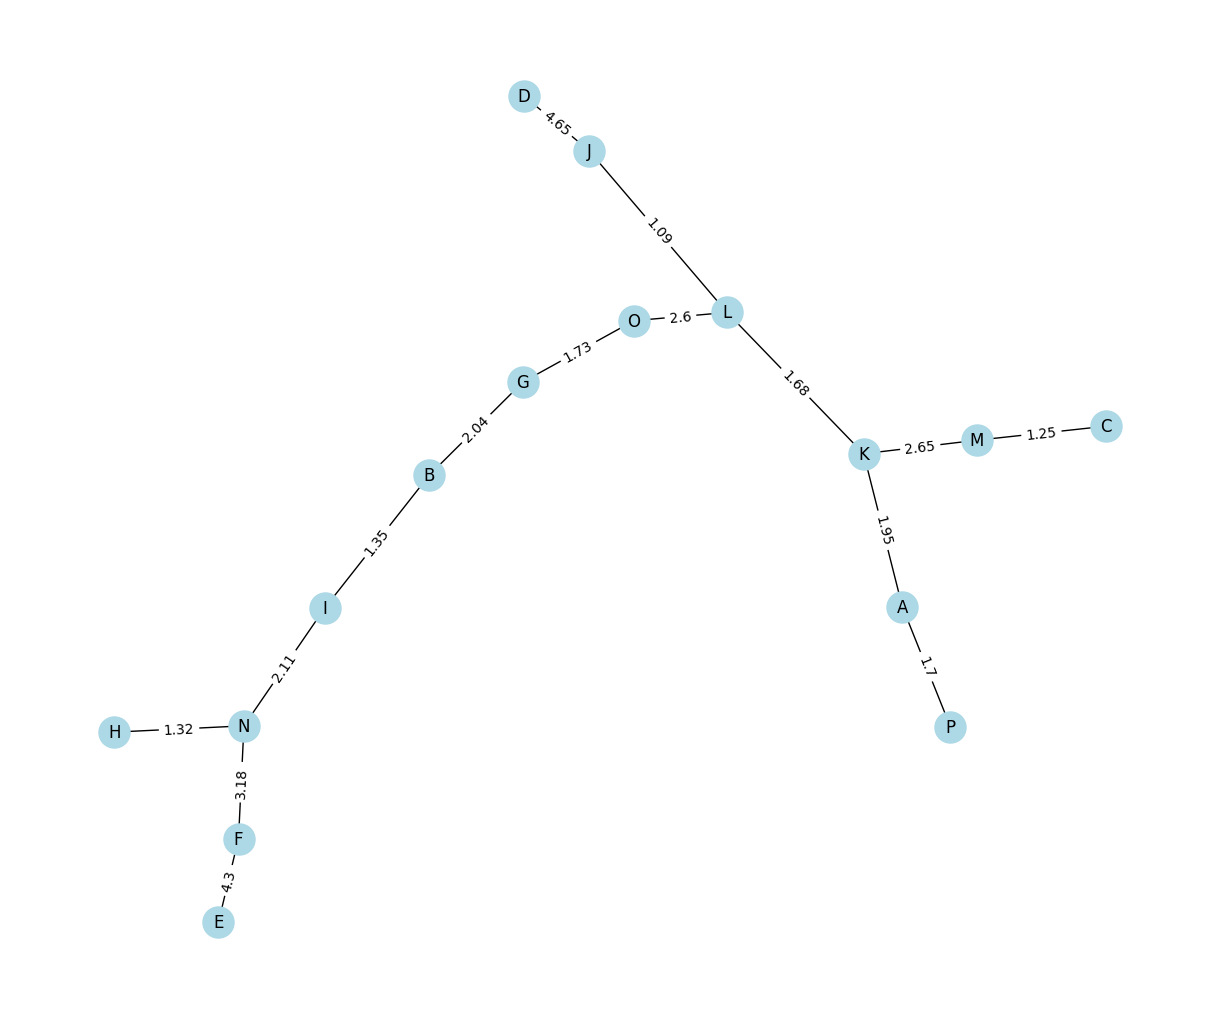

In [155]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10)) # Dibujo más grande
pos = nx.spring_layout(G) # Disposición de los nodos
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500) # Dibujamos nodos y aristas base
# Extraer y dibujar los costes
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


---
#### **B) Algoritmo de Kruskal**

In [156]:
def algoritmo_kruskal(grafo):
  aristas = []
  padre = {}
  # Creamos la lista de aristas
  for origen, destino in grafo.items():
    for vecino, coste_vecino in destino:
      aristas.append((coste_vecino, origen, vecino))
      # Inicializamos los padres
  for nodo in grafo:
    padre[nodo] = nodo

  aristas.sort()
  solucion = []

  for coste, origen, destino in aristas:
    # 1. Buscamos quién es el jefe supremo de 'origen'
    lider_origen = buscar_líder(padre, origen)

    # 2. Buscamos quién es el jefe supremo de 'destino'
    lider_destino = buscar_líder(padre, destino)

    if lider_origen != lider_destino:
      padre[lider_origen] = lider_destino
      solucion.append((coste, origen, destino))
  return solucion

#### **Función Buscar Líder**

In [157]:
def buscar_líder(padre, nodo):
    if padre[nodo] == nodo:
      return nodo # Devuelve el nodo
    else:
      return buscar_líder(padre, padre[nodo]) # Devuelve el resultado de esa búsqueda hacia atrás

#### **Función Costo Total**

In [158]:
def costo_total_kruskal(aristas):
  costes =  []
  for costo, o, d in aristas: # Cambiamos orden de lectura con respecto a Prim
    costes.append(costo)
  return sum(costes)

#### **Visualizar Grafo**

In [159]:
G = nx.Graph()
ordenado = []
for c ,o ,d in algoritmo_kruskal(construir_grafo()):
  ordenado.append((o, d, c))
G.add_weighted_edges_from(ordenado)

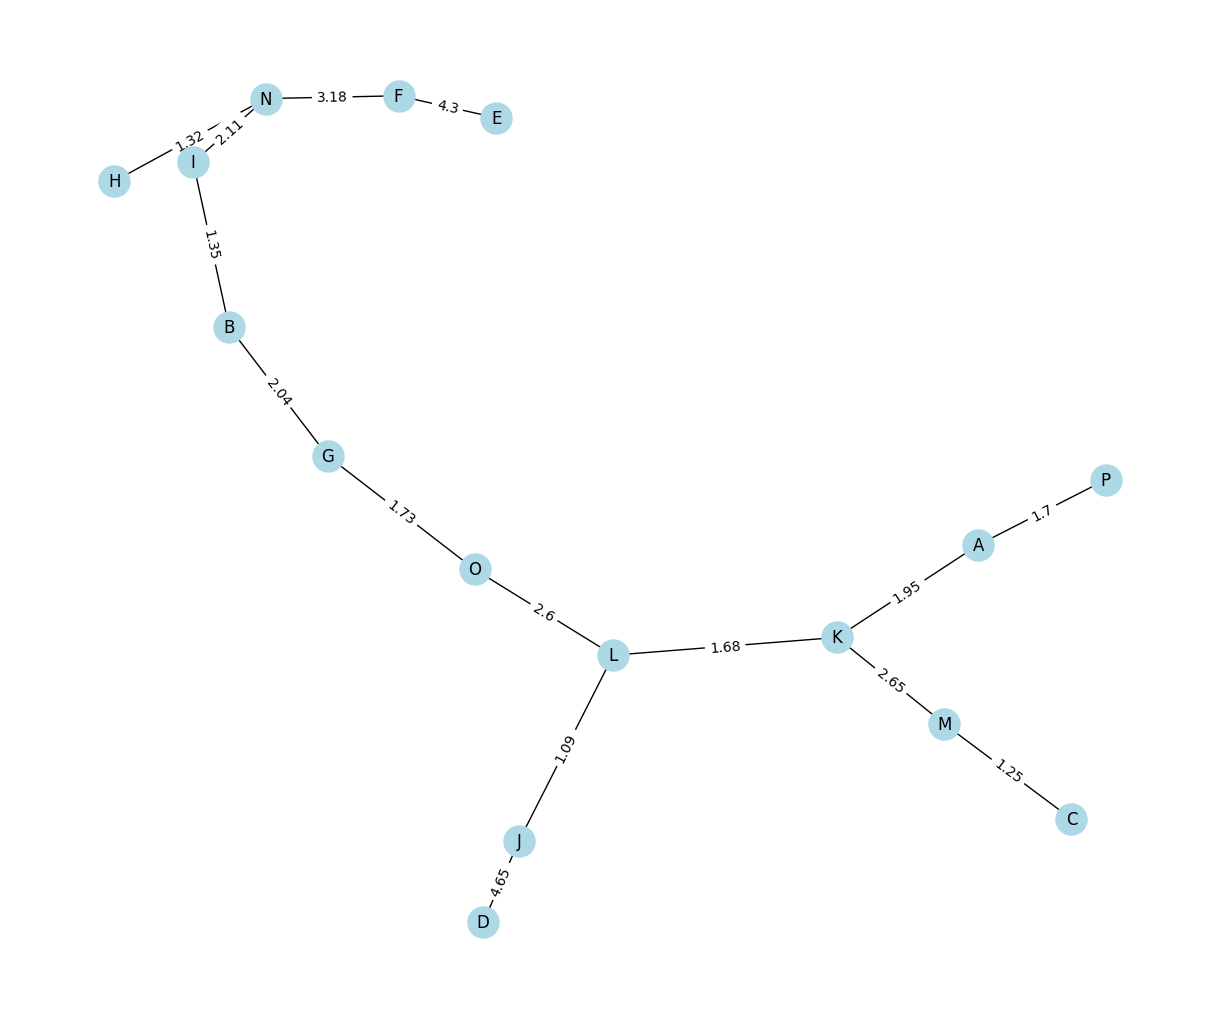

In [160]:
plt.figure(figsize=(12, 10)) # Dibujo más grande
pos = nx.spring_layout(G) # Disposición de los nodos
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500) # Dibujamos nodos y aristas base
# Extraer y dibujar los costes
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


----
## **3. Archivo output.txt**


In [161]:
resultado_prim = algoritmo_prim(construir_grafo())
coste_prim = costo_total_prim(resultado_prim)
resultado_kruskal = algoritmo_kruskal(construir_grafo())
coste_kruskal = costo_total_kruskal(resultado_kruskal)

# 1. Creamos el archivo de texto
with open('output_print.txt', 'w') as f:
    f.write("REPORTE DE ANÁLISIS CON ALGORITMOS VORACES\n")
    f.write("========================================\n\n")
    f.write(f"Listado detallado usando el Algoritmo Prim:\n")
    f.write("-----------------------------------------------\n")
    f.write(f"{resultado_prim}\n\n")
    f.write(f"Coste total:\n")
    f.write(f"{coste_prim}\n")
    f.write("-----------------------------------------------\n")
    f.write("-----------------------------------------------\n")
    f.write(f"Listado detallado usando el Algoritmo Kruskal:\n")
    f.write("-----------------------------------------------\n")
    f.write(f"{resultado_kruskal}\n\n")
    f.write(f"Coste total:\n")
    f.write(f"{coste_kruskal}\n")
print("¡Archivo generado con éxito!")

¡Archivo generado con éxito!
